# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Price

Download price data for Cathay Pacific and crude oil.

In [2]:
cathay = pd.read_csv('data/0293.HK.csv', index_col=0, parse_dates=True)

In [3]:
oil = pd.read_csv('data/CL=F.csv', index_col=0, parse_dates=True)

# Correlation

To Cathay Pacific, a higher crude oil price means high operating cost for the business, so normally we expect to see a negative correlation between the stock price and oil price.

In [4]:
corr_n = lambda n: pd.concat([cathay.Close.pct_change(n), oil.Close.pct_change(n)], axis=1).dropna().corr().iloc[0,1]

In [5]:
pd.Series({n: corr_n(n) for n in (1,5,10,21,63,126,252,512)})

1      0.036284
5      0.033402
10     0.059061
21     0.098648
63     0.173928
126    0.154192
252    0.291563
512    0.465908
dtype: float64

However, when calculating the correlation between percentage changes for the two series, it show positive correlation. The longer the period, the strong the positive correlation.

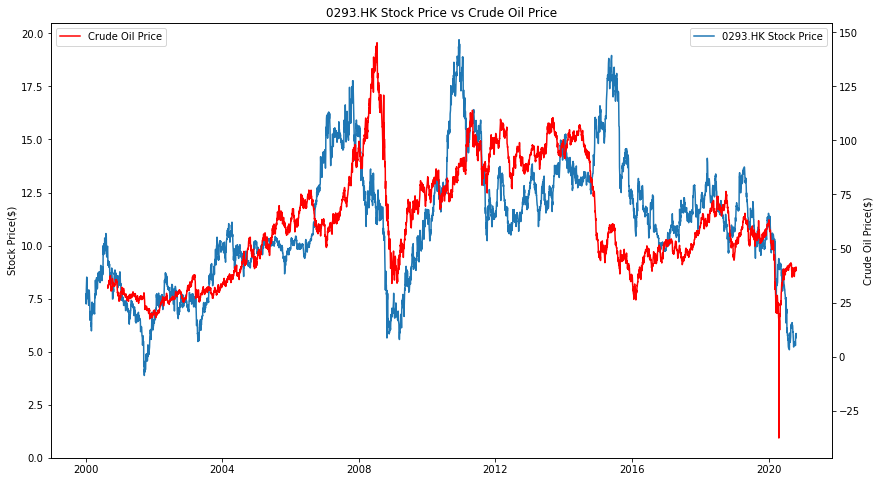

In [6]:
_, ax0 = plt.subplots(figsize=(14,8))
ax1 = ax0.twinx()
ax0.set_title('0293.HK Stock Price vs Crude Oil Price')
ax0.plot(cathay.Close.loc['2000-01-01':], label='0293.HK Stock Price')
ax0.set_ylabel('Stock Price($)')
ax0.set_ylim(bottom=0)
ax0.legend(loc='upper right')
ax1.plot(oil.Close.loc['2000-01-01':], c='red', label='Crude Oil Price')
ax1.set_ylabel('Crude Oil Price($)')
ax1.legend(loc='upper left')

By looking at the two chart, we can easily see that they roughly follow the same cycle.

# Conclusion

Hedging curde oil price may be a mistake at the first place, because oil price tends to go higher when airlines business is doing great. By hedging the crude oil you mean to buy more crude oil in advance and attempt to save some costs when oil price go even higher. In such case, airline business should be doing great as implied by the higher oil demand by the market, and management probably should not worry about saving cost. But the management still go for hedging simply because they wanna maximize the profit margin when cycle is going up. However, this left the company with extra bias when suddenly the expected oil usage goes down, which brings the long oil position directly into a loss. This is exactly what happened during the last six years since 2014.